In [1]:
import plons
import os
import numpy as np
import matplotlib.pyplot        as plt
import matplotlib.lines         as mlines


import plons.ConversionFactors_cgs        as cgs
import plons.OrbitalEvolution             as ov

In [37]:
model = 'v05e50'
run    = '/lhome/jolienm/Documents/TierModels/finalModelsAccrDisks/'+str(model)
# dump   = 245

In [25]:
'''
Makes plot of the evolution of mass accretion rate by the companion
returns timeArray and mass accretion rate to make plot yourself
'''

timeArray,accrRates = ov.calc_accrRates(setup,sinkData)
# plt.plot(timeArray, accrRates,color = 'crimson', linestyle = 'solid')    
# handles_ap    = [BHL,simulation, apaLine, perLine]
#Plot BHL mass accretion rate
# time,MaccrBHL = ov.BHLMassAccrRate(setup,sinkData)
# plt.plot(time, MaccrBHL/cgs.Msun * cgs.year,color = 'royalblue', linestyle = 'dotted',linewidth=0.8)    
# maxi = 1.1* max(np.max(accrRates),np.max(MaccrBHL/cgs.Msun * cgs.year))
        
#     mini = 0
#     plotVerticalApaPerLines(setup,sinkData,mini,maxi)
    
#     # ax = plt.subplot(111)
#     # ax.grid()
#     plt.xlabel('Time [yrs]', fontsize = 14)
#     plt.ylabel('Mass accretion rate [Msun/yr]', fontsize = 14)

#     # plt.title('Mass accretion rate by the companion', fontsize = 18)
#     plt.legend(handles = handles_ap)
#     fig.tight_layout()

#     plt.savefig(os.path.join(loc, 'png/evolution_MaccrRate_companion_BHLcomp.png'))
#     plt.savefig(os.path.join(loc, 'pdf/evolution_MaccrRate_companion_BHLcomp.pdf'))
#     plt.close()

Mass accreted / last 2 orbital periods /Mdot is  0.12528319330124596
-------------------


In [38]:
'''
Load in data
'''    
setup = plons.LoadSetup(run, "wind")
# dumpData = plons.LoadFullDump(os.path.join(run, f"wind_%05d" % dump), setup)
sinkData = plons.LoadSink(run, "wind",setup["icompanion_star"])

timeArray,accrRates = ov.calc_accrRates(setup,sinkData)

Jcomp,derivJ,j,jKepl,timeArray = ov.calcJ(setup,sinkData)
print(model,' : ',np.mean(j[-50:-1]),np.mean(jKepl)) 
print(np.mean(j[-50:-1])/np.mean(jKepl))

Mass accreted / last 2 orbital periods /Mdot is  0.20644061975571706
-------------------
Mass accreted / last 2 orbital periods /Mdot is  0.20644061975571706
-------------------
v05e50  :  3.8260606890766147e+18 4.4557270699433093e+18
0.858683808280316


In [34]:
print(model,' : ',np.mean(j[-200:-1]),np.mean(jKepl)) 
print(np.mean(j[-200:-1])/np.mean(jKepl))

v20e50  :  3.853577486468725e+18 4.4557258327996457e+18
0.8648596504977113


0.834 voor v05e00
0.850 voor v10e00
0.892 voor v20e00

0.859 voor v05e50
0.868 voor v10e50
0.865 voor v20e50


In [10]:
newj = j/accrRates

/tmp/ipykernel_17657/3971930988.py:1: RuntimeWarning: invalid value encountered in divide
  newj = j/accrRates


In [7]:
colors = ['firebrick','goldenrod','navy']

i = 0

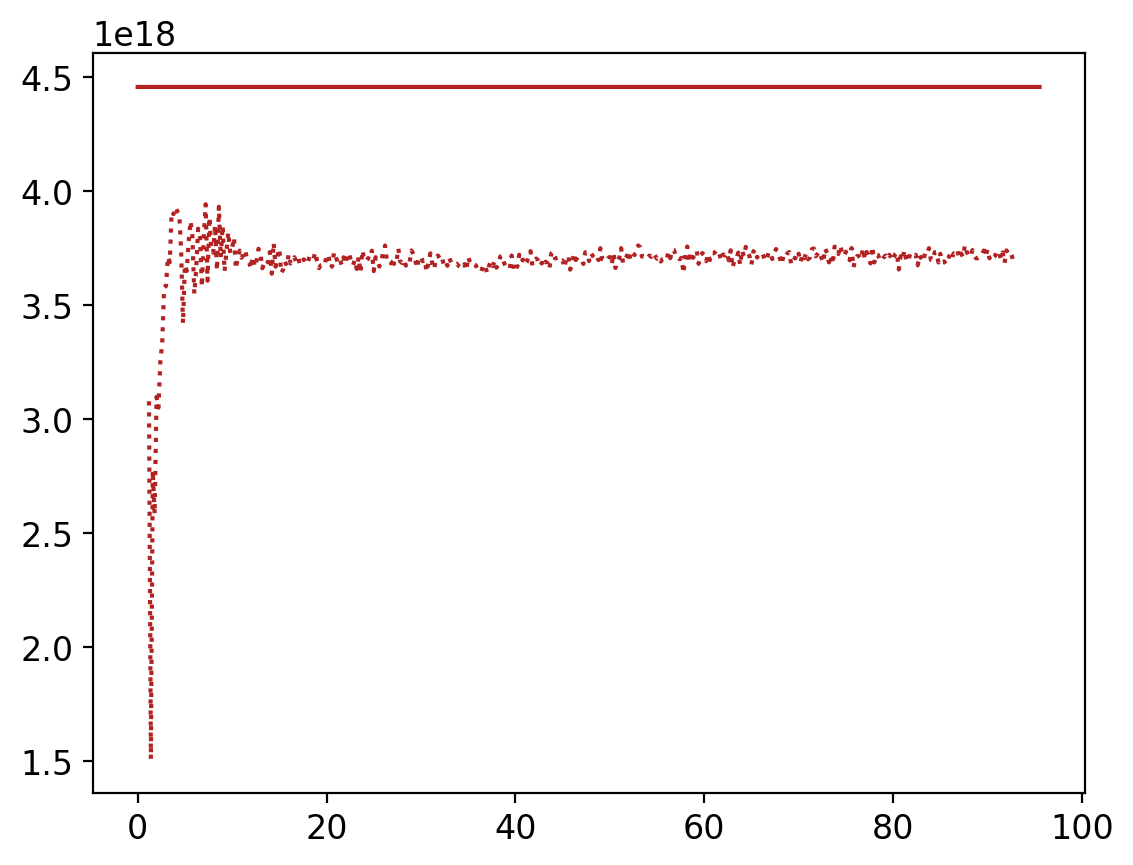

In [10]:
plt.plot(timeArray,j,linestyle = ':',c = colors[i], label=str(model))#,c = CB_color_cycle[2*i+1])
plt.plot(sinkData['time'],jKepl,linestyle = '-',c = colors[i], label=r'j_K')#,c = CB_color_cycle[2*i+1])

In [6]:
def plot_J_3models(modelNames,saveName):
    fig1, ax1 = plt.subplots()
    fig2, ax2 = plt.subplots()
    fig3, ax3 = plt.subplots()
    fig4, ax4 = plt.subplots()
    fig5, ax5 = plt.subplots()
    # fig6, ax6 = plt.subplots()
    lineStyles = ['-.','--',':','-','-']
    colors = ['firebrick','goldenrod','navy']
    i = 0
    
    for model in modelNames:
        run    = '/lhome/jolienm/Documents/TierModels/finalModelsAccrDisks/'+str(model)
        setup = plons.LoadSetup(run, "wind")
        sinkData = plons.LoadSink(run, "wind",setup["icompanion_star"])
        Jcomp,derivJ,j,jKepl,timeArray = ov.calcJ(setup,sinkData)
        Jcomp_z = sinkData['J_comp'].transpose()[2]
        ax1.plot(sinkData['time'],Jcomp_z,linestyle = lineStyles[i],c = colors[i],label=str(model))#,c = CB_color_cycle[2*i+1])
        ax2.plot(timeArray,derivJ,linestyle = lineStyles[i],c = colors[i], label=str(model))#,c = CB_color_cycle[2*i+1])
        ax3.plot(timeArray,j,linestyle = lineStyles[i],c = colors[i], label=str(model))#,c = CB_color_cycle[2*i+1])
        ax3.plot(sinkData['time'],jKepl,linestyle = '-',c = colors[i],label = r'j_K')# label=str(model))#,c = CB_color_cycle[2*i+1])
        ax4.plot(sinkData['time'],Jcomp,linestyle = lineStyles[i],c = colors[i],label=str(model))
        ax5.plot(sinkData['massComp']/cgs.Msun,Jcomp,linestyle = lineStyles[i],c = colors[i],label=str(model))
        i = i+1
        
        
    ax1.legend(fontsize = 12)
    ax1.set_xlabel(r't [yrs] ',fontsize = 12)
    ax1.set_ylabel(r'J_z [g cm$^2$ / s]',fontsize = 12,rotation = 90)
    ax1.tick_params(axis='x', labelsize=12)
    ax1.tick_params(axis='y', labelsize=12)

    ax2.legend(fontsize = 12)
    ax2.set_xlabel(r't [yrs] ',fontsize = 12)
    ax2.set_ylabel(r'd$J_s$/$d$t [g cm$^2$ / s$^2$]',fontsize = 12,rotation = 90)
    ax2.tick_params(axis='x', labelsize=12)
    ax2.tick_params(axis='y', labelsize=12)
    # mini = 0
    # maxi = np.max(derivJ)
    # ov.plotVerticalApaPerLines(setup,sinkData,mini,maxi)

    ax3.legend(fontsize = 12)
    ax3.set_xlabel(r't [yrs] ',fontsize = 12)
    ax3.set_ylabel(r'j [cm$^2$/s]',fontsize = 12,rotation = 90)
    ax3.tick_params(axis='x', labelsize=12)
    ax3.tick_params(axis='y', labelsize=12)
    # mini = 0
    # maxi = np.max(j)
    # ov.plotVerticalApaPerLines(setup,sinkData,mini,maxi)

    ax4.legend(fontsize = 12)
    ax4.set_xlabel(r't [yrs] ',fontsize = 12)
    ax4.set_ylabel(r'J [g cm$^2$ / s]',fontsize = 12,rotation = 90)
    ax4.tick_params(axis='x', labelsize=12)
    ax4.tick_params(axis='y', labelsize=12)
    
    
    ax5.legend(fontsize = 12)
    ax5.set_xlabel(r'Mc [Msun] ',fontsize = 12)
    ax5.set_ylabel(r'J [g cm$^2$ / s]',fontsize = 12,rotation = 90)
    ax5.tick_params(axis='x', labelsize=12)
    ax5.tick_params(axis='y', labelsize=12)
    
    # ax6.legend(fontsize = 12)
    # ax6.set_xlabel(r't [yrs] ',fontsize = 12)
    # ax6.set_ylabel(r'j_K [cm$^2$/s]',fontsize = 12,rotation = 90)
    # ax6.tick_params(axis='x', labelsize=12)
    # ax6.tick_params(axis='y', labelsize=12)
    
    
    fig1.savefig('/lhome/jolienm/Documents/TierModels/finalModelsAccrDisks/plotsAnalysis/evolution_Jz_'+saveName+'.png')
    fig2.savefig('/lhome/jolienm/Documents/TierModels/finalModelsAccrDisks/plotsAnalysis/evolution_dJdt_'+saveName+'.png')
    fig3.savefig('/lhome/jolienm/Documents/TierModels/finalModelsAccrDisks/plotsAnalysis/evolution_j_'+saveName+'.png')
    fig4.savefig('/lhome/jolienm/Documents/TierModels/finalModelsAccrDisks/plotsAnalysis/evolution_J_'+saveName+'.png')
    fig5.savefig('/lhome/jolienm/Documents/TierModels/finalModelsAccrDisks/plotsAnalysis/evolution_J_Mc_'+saveName+'.png')
    # fig6.savefig('/lhome/jolienm/Documents/TierModels/finalModelsAccrDisks/plotsAnalysis/evolution_jK_'+saveName+'.png')


In [7]:
def plot_J_6models(modelNames,saveName):
    
    e00       = mlines.Line2D([],[], color = 'k', linestyle = '-',  label = 'e00')
    e50       = mlines.Line2D([],[], color = 'k', linestyle = ':', label = 'e50')
    v05       = mlines.Line2D([],[], color = 'firebrick', linestyle = '-', label = 'v05')
    v10       = mlines.Line2D([],[], color = 'goldenrod', linestyle = '-', label = 'v10')
    v20       = mlines.Line2D([],[], color = 'navy', linestyle = '-', label = 'v20')
    handles_allModels = [e00,e50,v05,v10,v20]
    
    jKepl     = mlines.Line2D([],[], color = 'k', linestyle = '--', linewidth = 0.5, label = r'j$_{K}$')
    handles_j = [jKepl]
    
    fig1, ax1 = plt.subplots()
    fig2, ax2 = plt.subplots()
    fig3, ax3 = plt.subplots()
    fig4, ax4 = plt.subplots()
    fig5, ax5 = plt.subplots()
    # fig6, ax6 = plt.subplots()
    # lineStyles = ['-.','--',':','-','-']
    lineStyles = ['-','-','-',':',':',':']
    colors = ['firebrick','goldenrod','navy','firebrick','goldenrod','navy']
    i = 0
    
    for model in modelNames:
        run    = '/lhome/jolienm/Documents/TierModels/finalModelsAccrDisks/'+str(model)
        setup = plons.LoadSetup(run, "wind")
        sinkData = plons.LoadSink(run, "wind",setup["icompanion_star"])
        Jcomp,derivJ,j,jKepl,timeArray = ov.calcJ(setup,sinkData)
        print(model,' : ',np.mean(j[-50:-1]),np.mean(jKepl))
        print(np.mean(j[-50:-1])/np.mean(jKepl))
        Jcomp_z = sinkData['J_comp'].transpose()[2]
        # ax1.plot(sinkData['time'],Jcomp_z,linestyle = lineStyles[i],c = colors[i],label=str(model))#,c = CB_color_cycle[2*i+1])
        ax2.plot(timeArray,derivJ,linestyle = lineStyles[i],c = colors[i], label=str(model))#,c = CB_color_cycle[2*i+1])
        ax3.plot(timeArray,j,linestyle = lineStyles[i],c = colors[i], label=str(model))#,c = CB_color_cycle[2*i+1])
        # ax3.plot(sinkData['time'],jKepl,linestyle = '-',c = colors[i],label = r'j_K')# label=str(model))#,c = CB_color_cycle[2*i+1])
        # ax4.plot(sinkData['time'],Jcomp,linestyle = lineStyles[i],c = colors[i],label=str(model))
        # ax5.plot(sinkData['massComp']/cgs.Msun,Jcomp,linestyle = lineStyles[i],c = colors[i],label=str(model))
        i = i+1
    
    ax3.plot(sinkData['time'],jKepl,linestyle = '--',c = 'k',label = r'j_K',linewidth = 0.5)# label=str(model))#,c = CB_color_cycle[2*i+1])

        
    # ax1.legend(handles = handles_allModels, fontsize = 12)
    # ax1.set_xlabel(r't [yrs] ',fontsize = 12)
    # ax1.set_ylabel(r'J_z [g cm$^2$ / s]',fontsize = 12,rotation = 90)
    # ax1.tick_params(axis='x', labelsize=12)
    # ax1.tick_params(axis='y', labelsize=12)

    ax2.legend(handles = handles_allModels, fontsize = 12)
    ax2.set_xlabel(r't [yrs] ',fontsize = 12)
    ax2.set_ylabel(r'd$J_s$/d$t$ [g cm$^2$ / s$^2$]',fontsize = 12,rotation = 90)
    ax2.tick_params(axis='x', labelsize=12)
    ax2.tick_params(axis='y', labelsize=12)
    # mini = 0
    # maxi = np.max(derivJ)
    # ov.plotVerticalApaPerLines(setup,sinkData,mini,maxi)

    ax3.legend(handles = handles_j, fontsize = 12)
    ax3.set_xlabel(r't [yrs] ',fontsize = 12)
    ax3.set_ylabel(r'j [cm$^2$/s]',fontsize = 12,rotation = 90)
    ax3.tick_params(axis='x', labelsize=12)
    ax3.tick_params(axis='y', labelsize=12)
    # mini = 0
    # maxi = np.max(j)
    # ov.plotVerticalApaPerLines(setup,sinkData,mini,maxi)

#     ax4.legend(handles = handles_allModels, fontsize = 12)
#     ax4.set_xlabel(r't [yrs] ',fontsize = 12)
#     ax4.set_ylabel(r'J [g cm$^2$ / s]',fontsize = 12,rotation = 90)
#     ax4.tick_params(axis='x', labelsize=12)
#     ax4.tick_params(axis='y', labelsize=12)
    
    
#     ax5.legend(handles = handles_allModels, fontsize = 12)
#     ax5.set_xlabel(r'Mc [Msun] ',fontsize = 12)
#     ax5.set_ylabel(r'J [g cm$^2$ / s]',fontsize = 12,rotation = 90)
#     ax5.tick_params(axis='x', labelsize=12)
#     ax5.tick_params(axis='y', labelsize=12)
    
    # ax6.legend(handles = handles_allModels, fontsize = 12)
    # ax6.set_xlabel(r't [yrs] ',fontsize = 12)
    # ax6.set_ylabel(r'j_K [cm$^2$/s]',fontsize = 12,rotation = 90)
    # ax6.tick_params(axis='x', labelsize=12)
    # ax6.tick_params(axis='y', labelsize=12)
    
    
    # fig1.savefig('/lhome/jolienm/Documents/TierModels/finalModelsAccrDisks/plotsAnalysis/evolution_Jz_'+saveName+'.png')
    fig2.savefig('/lhome/jolienm/Documents/TierModels/finalModelsAccrDisks/plotsAnalysis/evolution_dJdt_'+saveName+'.png')
    fig3.savefig('/lhome/jolienm/Documents/TierModels/finalModelsAccrDisks/plotsAnalysis/evolution_j_'+saveName+'.png')
    # fig4.savefig('/lhome/jolienm/Documents/TierModels/finalModelsAccrDisks/plotsAnalysis/evolution_J_'+saveName+'.png')
    # fig5.savefig('/lhome/jolienm/Documents/TierModels/finalModelsAccrDisks/plotsAnalysis/evolution_J_Mc_'+saveName+'.png')
    # fig6.savefig('/lhome/jolienm/Documents/TierModels/finalModelsAccrDisks/plotsAnalysis/evolution_jK_'+saveName+'.png')


Mass accreted / last 2 orbital periods /Mdot is  0.12528319330124596
-------------------
Mass accreted / last 2 orbital periods /Mdot is  0.0993309234512213
-------------------
Mass accreted / last 2 orbital periods /Mdot is  0.04025906572407603
-------------------
Mass accreted / last 2 orbital periods /Mdot is  0.20644061975571706
-------------------
Mass accreted / last 2 orbital periods /Mdot is  0.12318795664275814
-------------------
Mass accreted / last 2 orbital periods /Mdot is  0.042975036856689776
-------------------


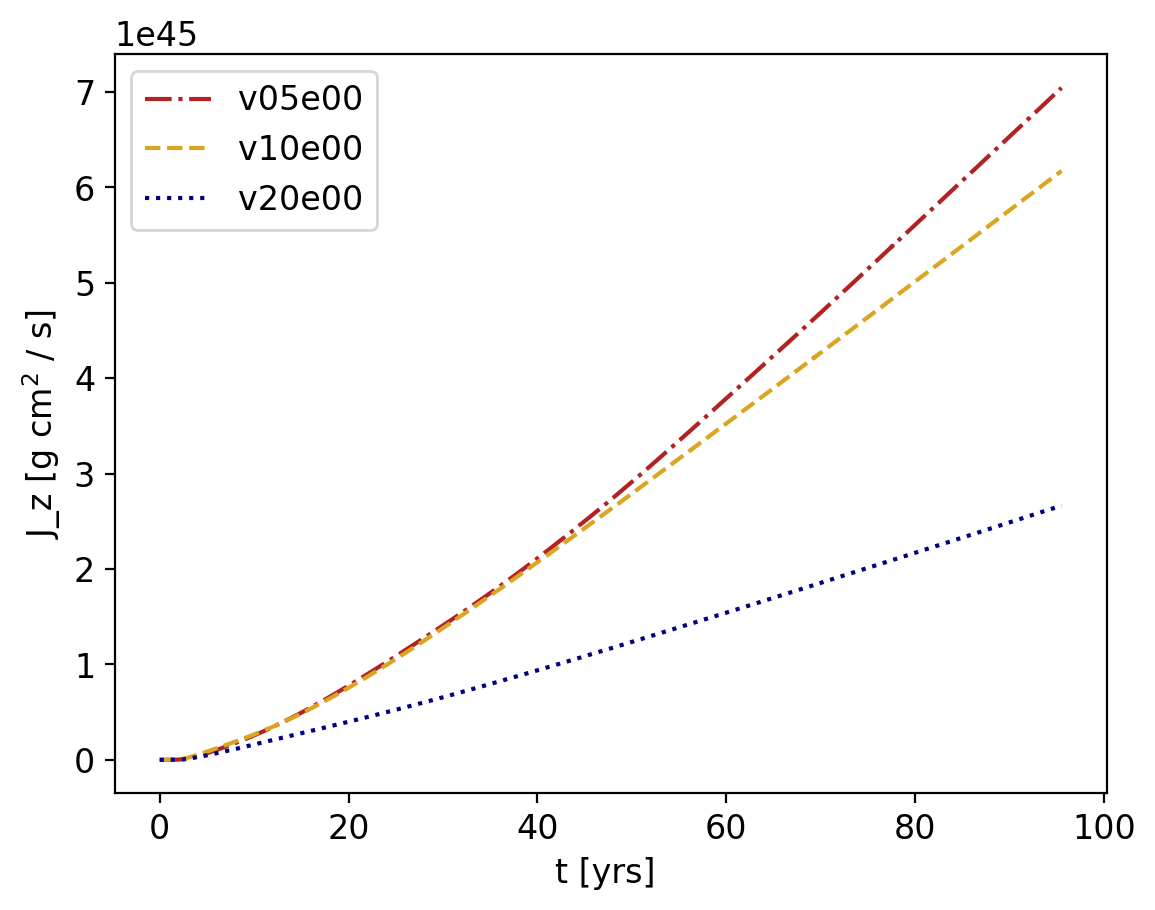

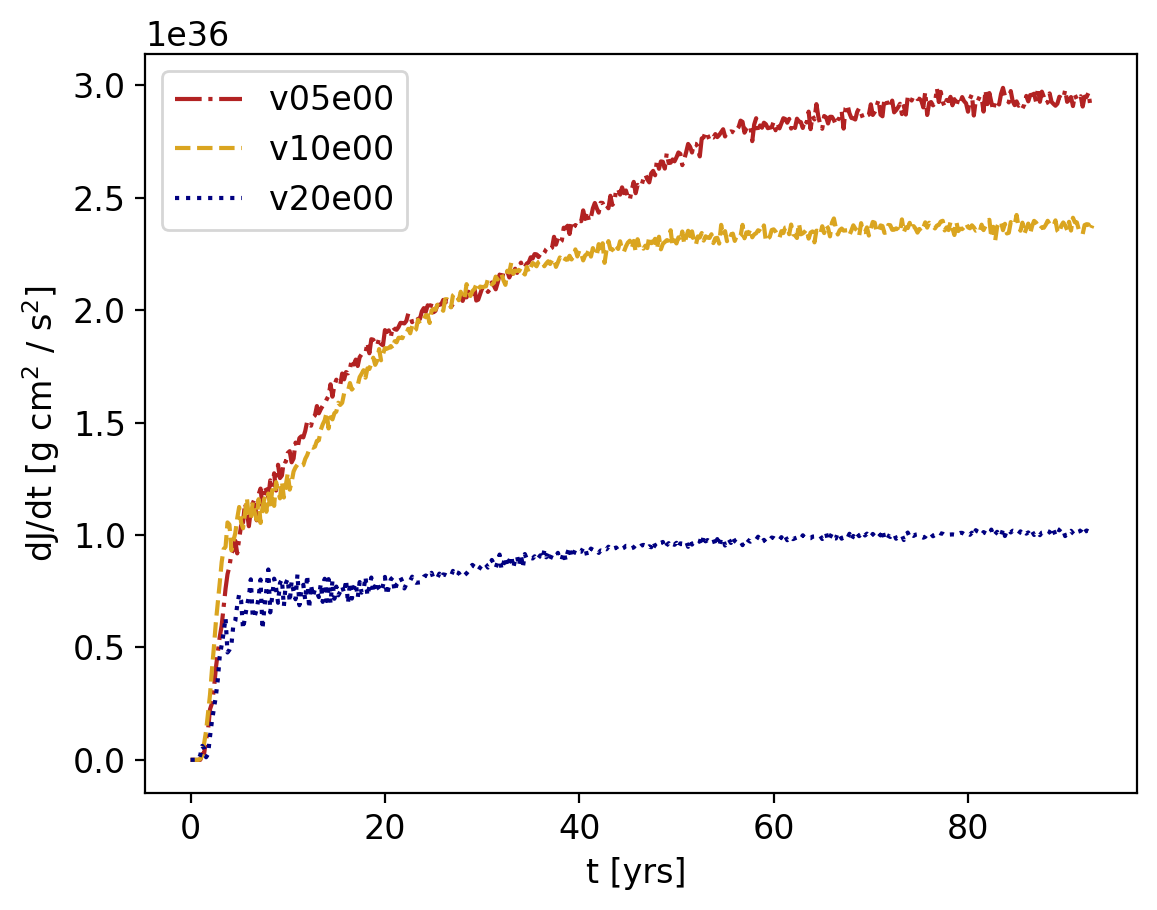

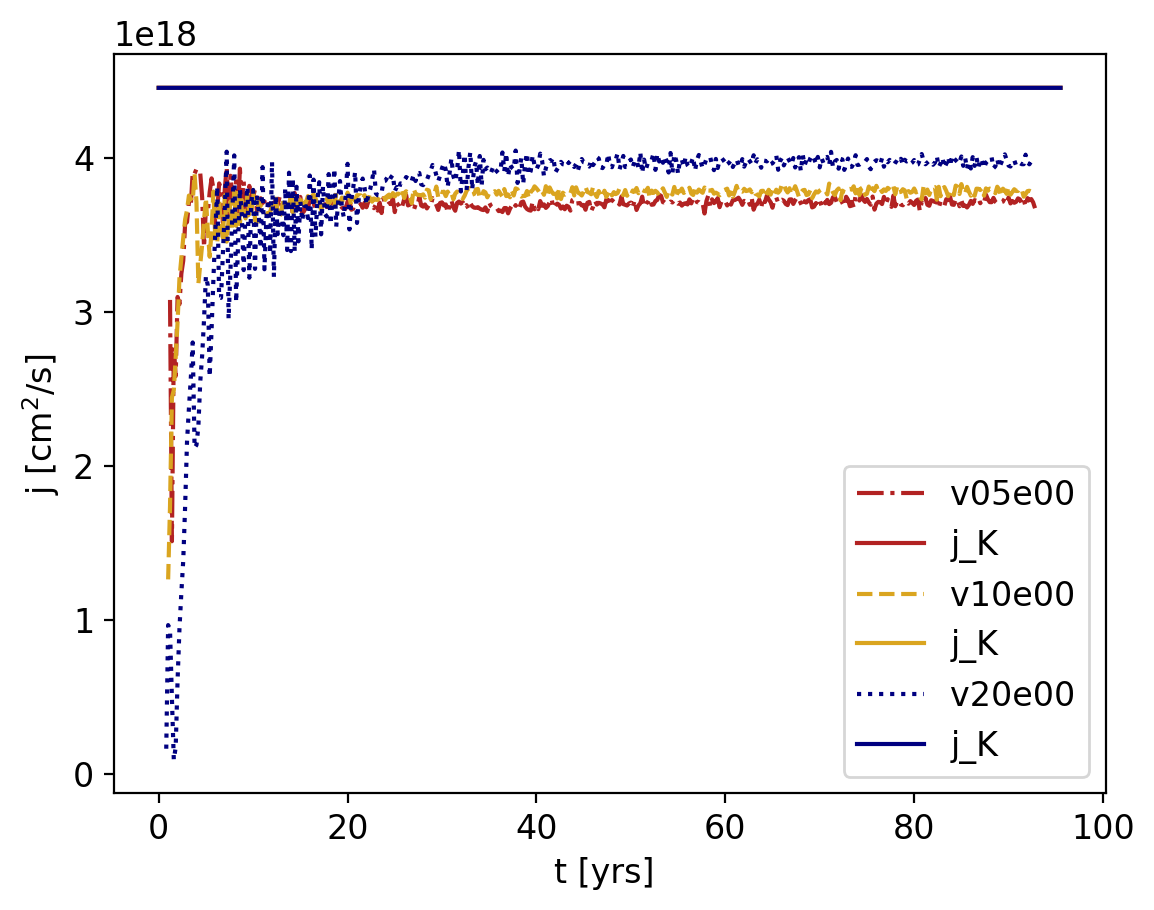

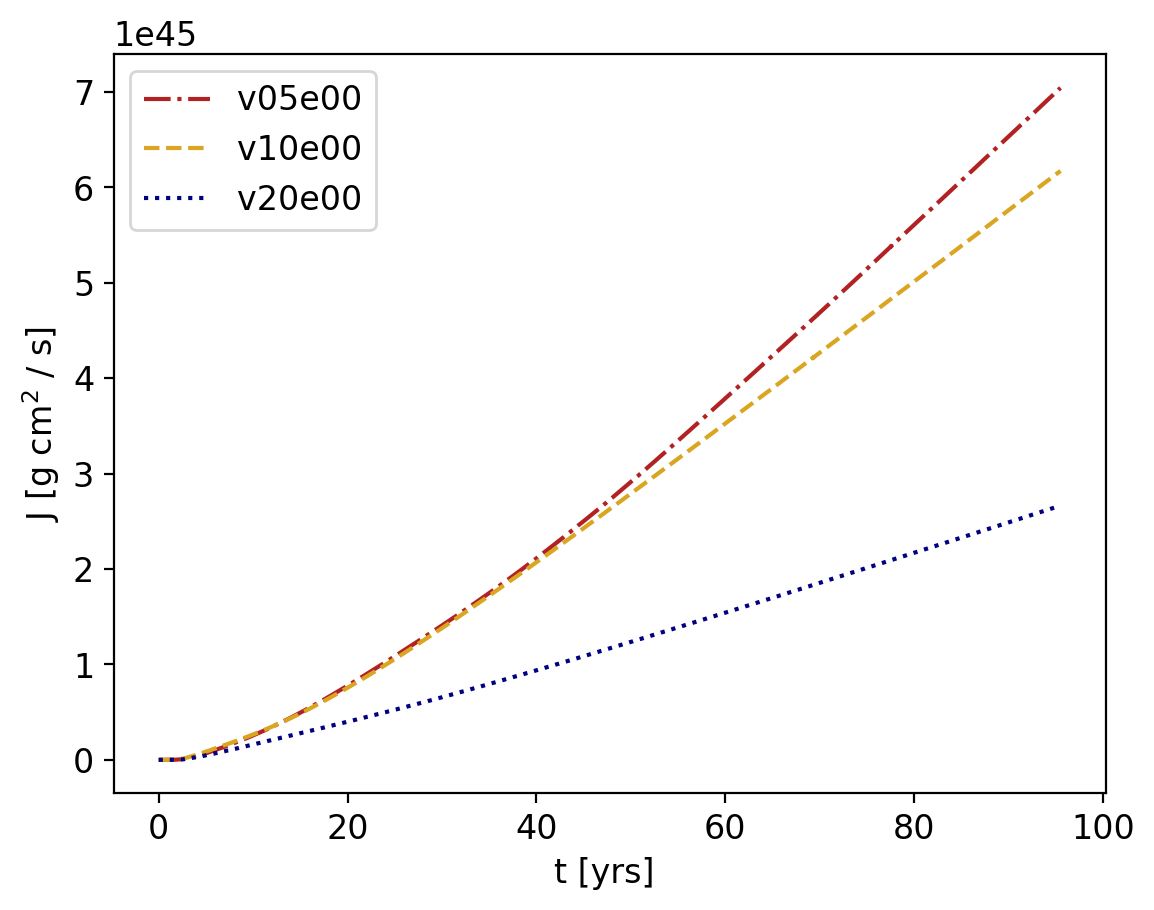

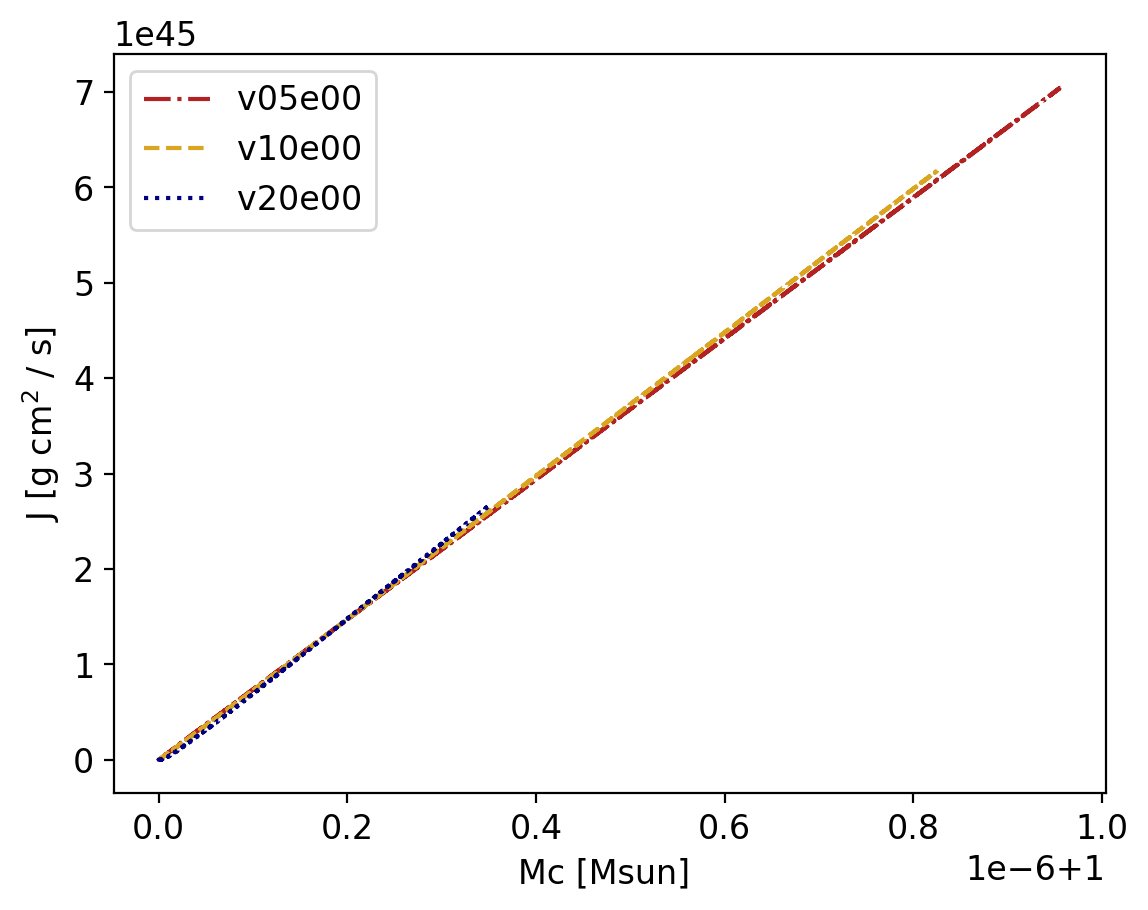

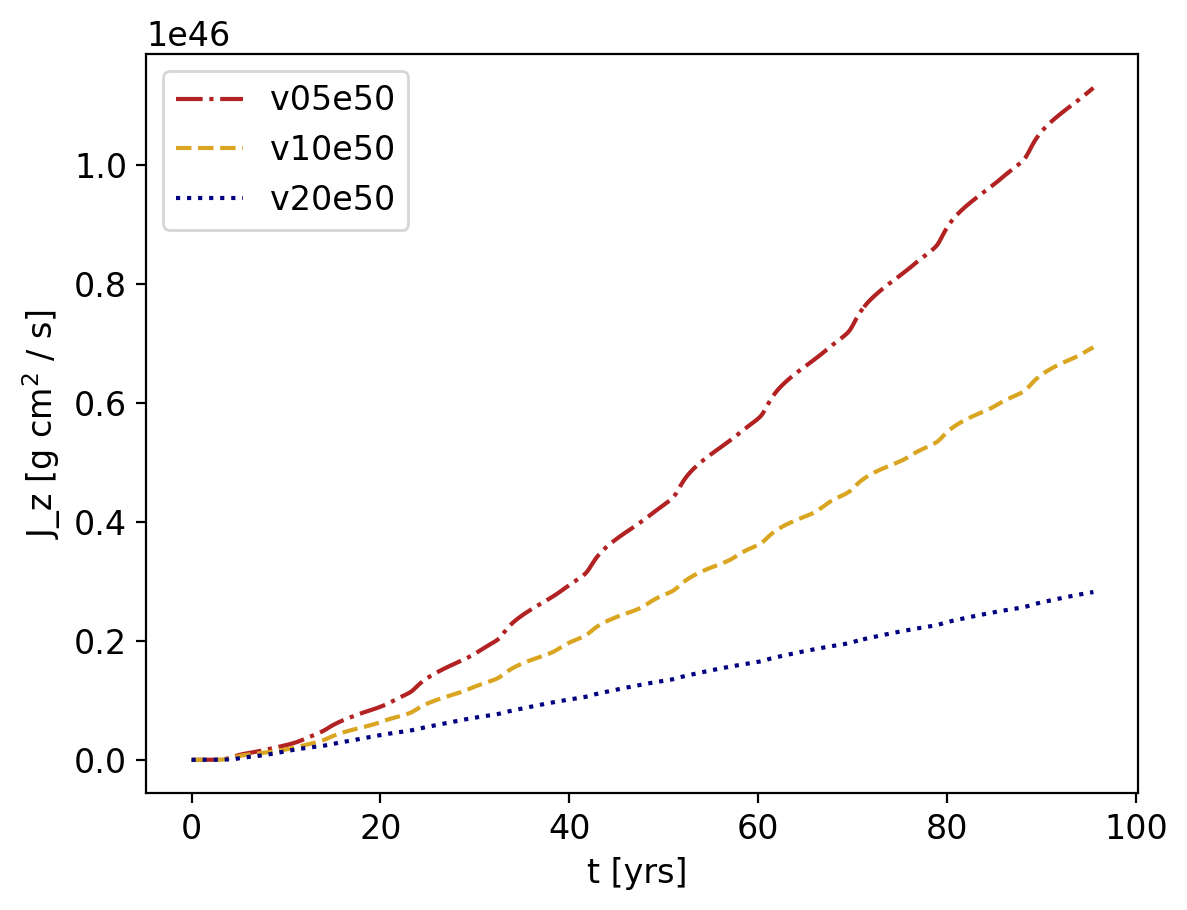

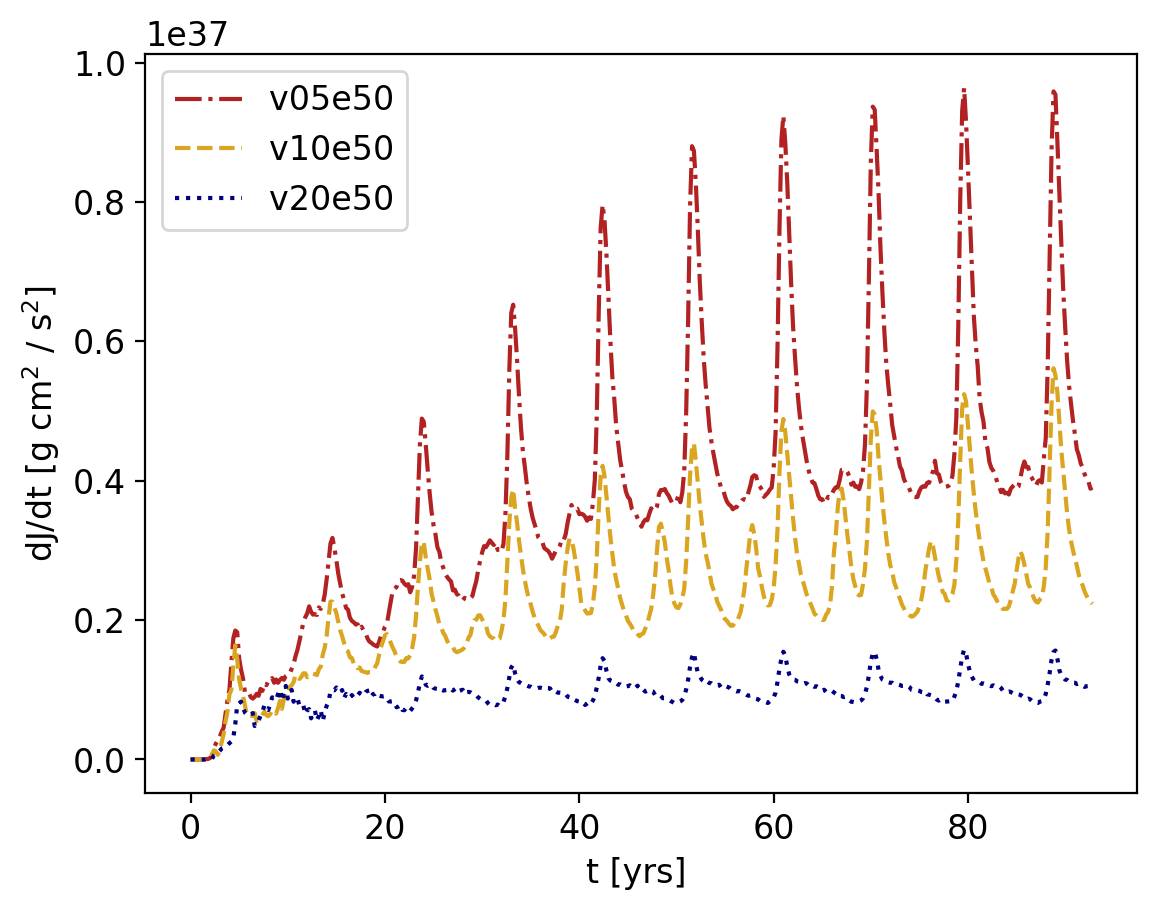

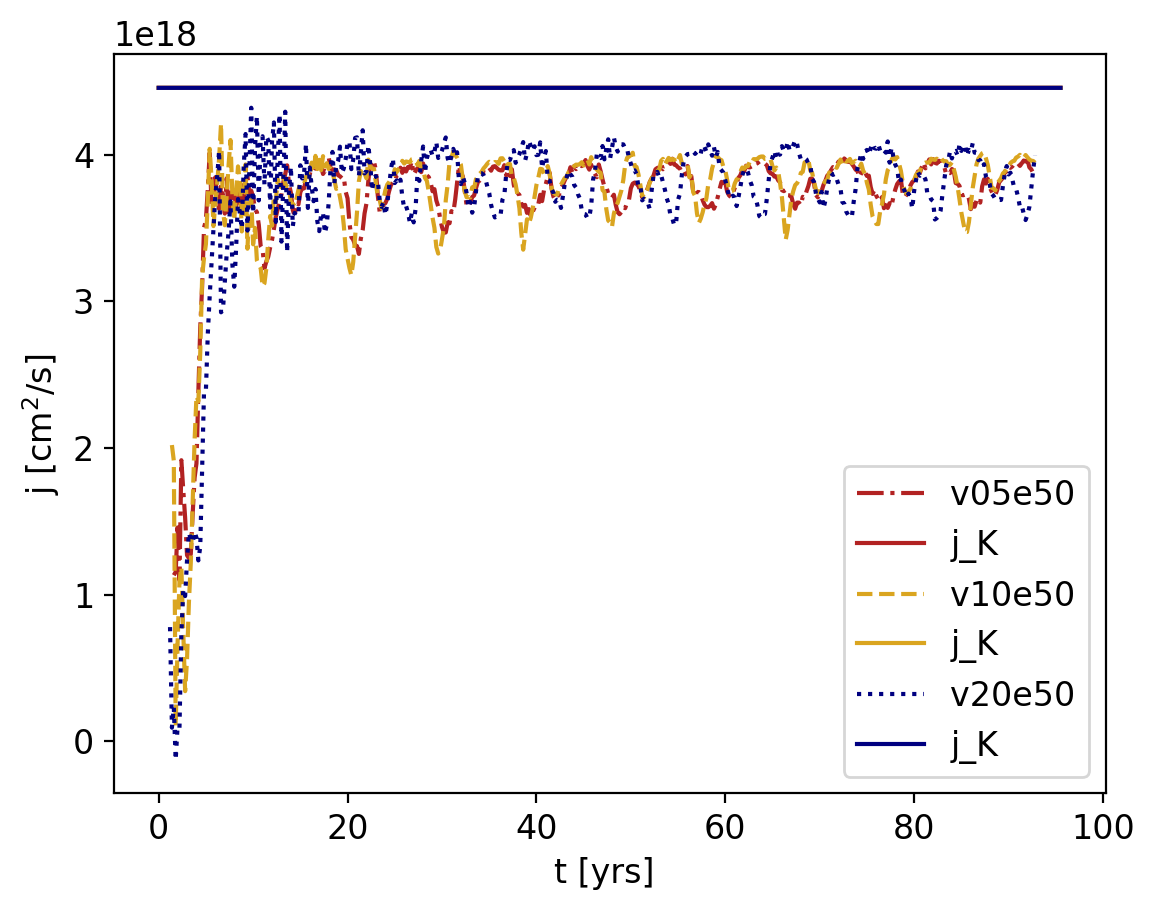

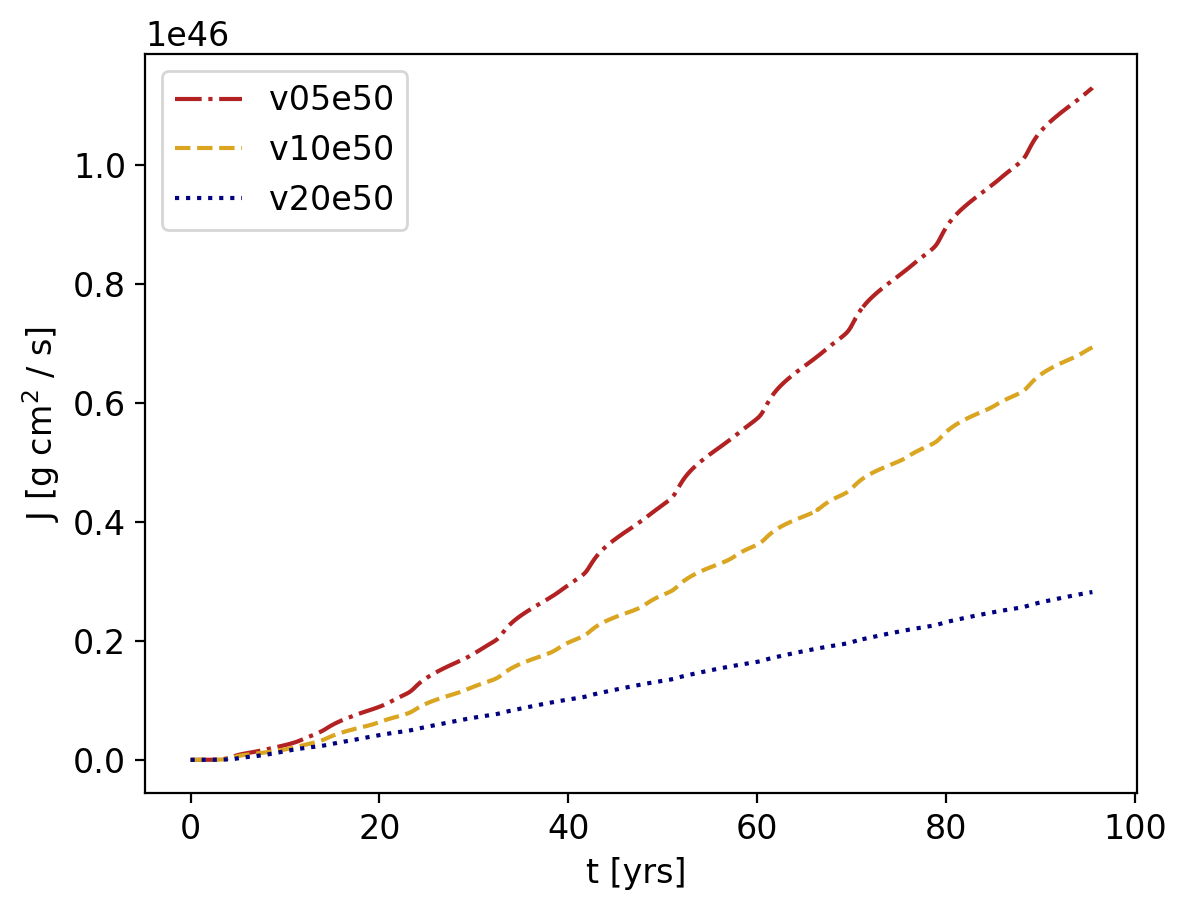

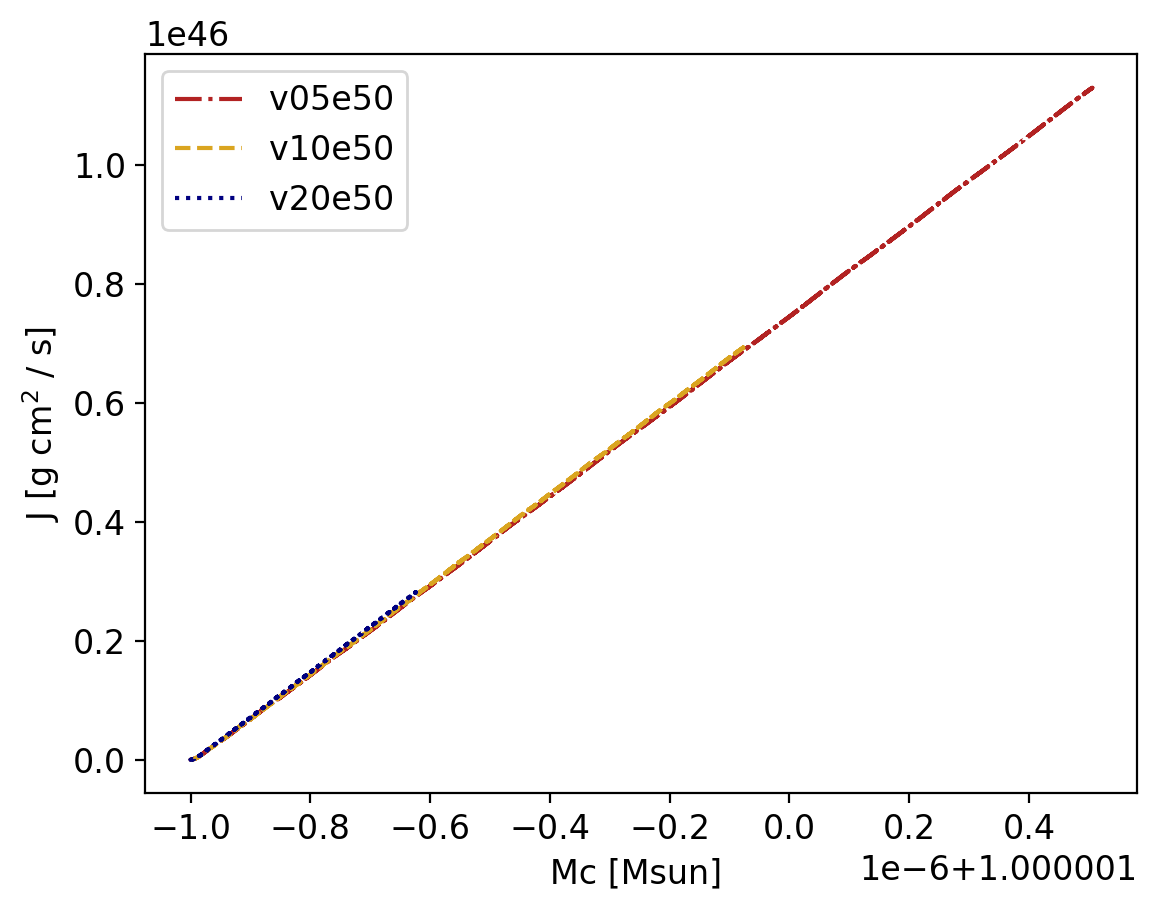

In [12]:
modelNames_e00 = ['v05e00','v10e00','v20e00']
modelNames_e50 = ['v05e50','v10e50','v20e50']
plot_J_3models(modelNames_e00,'e00')
plot_J_3models(modelNames_e50,'e50')


Mass accreted / last 2 orbital periods /Mdot is  0.12528319330124596
-------------------
R_*: 0.006951040076644811
R_*/Racc =  0.695104007664481
test
3.714869169377421e+18 3.71486916937742e+18
v05e00  :  3.7169187039002476e+18 4.4557264727673933e+18
0.8341891555995173
Mass accreted / last 2 orbital periods /Mdot is  0.0993309234512213
-------------------
R_*: 0.0072204800477108115
R_*/Racc =  0.7220480047710811
test
3.786183293050371e+18 3.786183293050371e+18
v10e00  :  3.7859688103961795e+18 4.4557263288332073e+18
0.8496861187135761
Mass accreted / last 2 orbital periods /Mdot is  0.04025906572407603
-------------------
R_*: 0.007948088137245414
R_*/Racc =  0.7948088137245414
test
3.9723712746069504e+18 3.97237127460695e+18
v20e00  :  3.9723162076862674e+18 4.455725820440996e+18
0.8915082228495639
Mass accreted / last 2 orbital periods /Mdot is  0.20644061975571706
-------------------
R_*: 0.007374070630726017
R_*/Racc =  0.7374070630726017
test
3.8262416343855836e+18 3.82624163438558

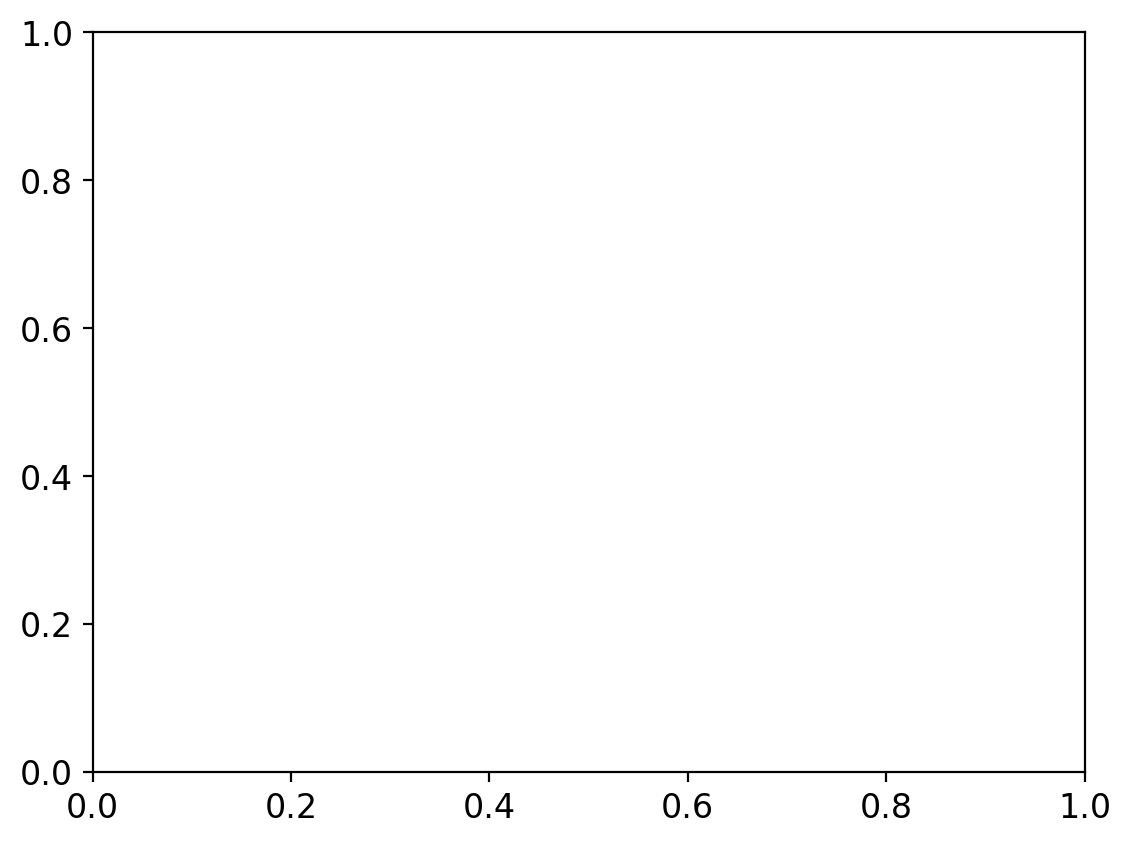

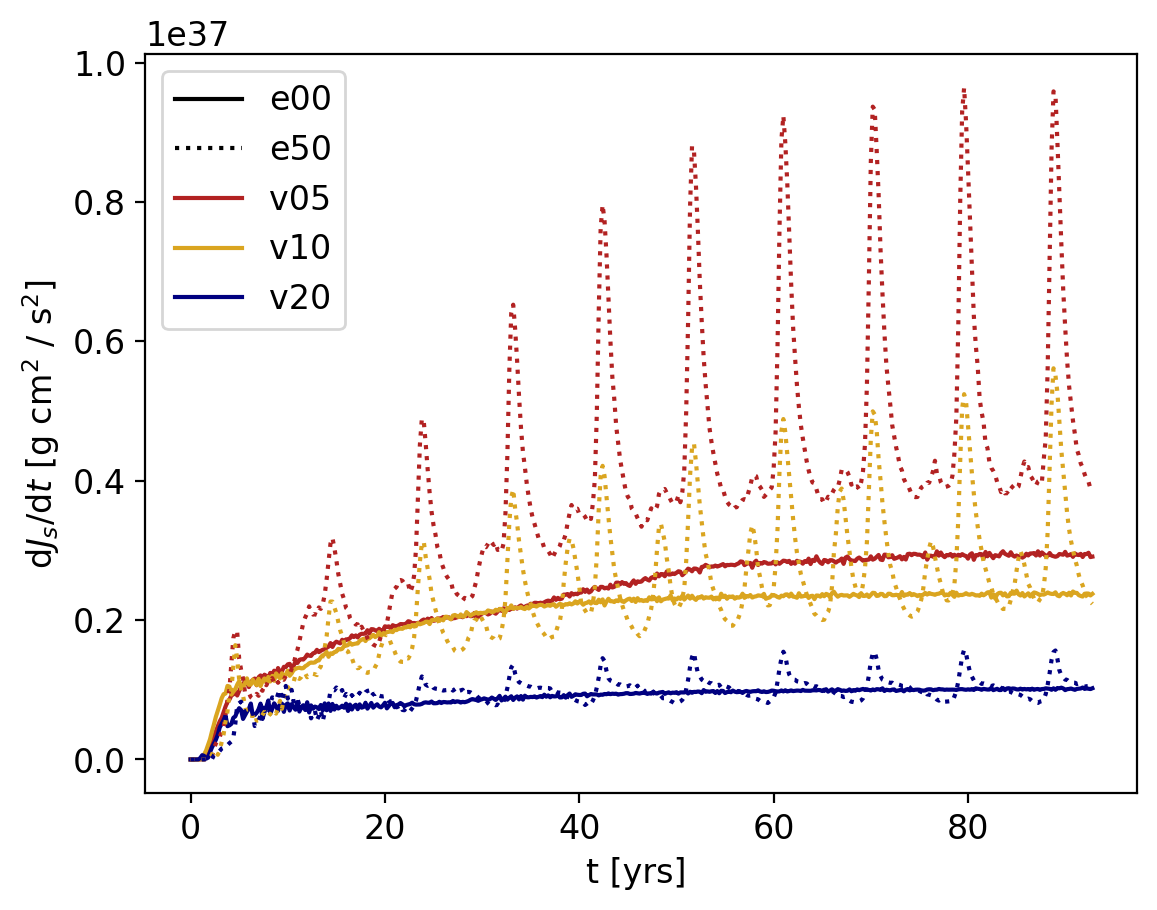

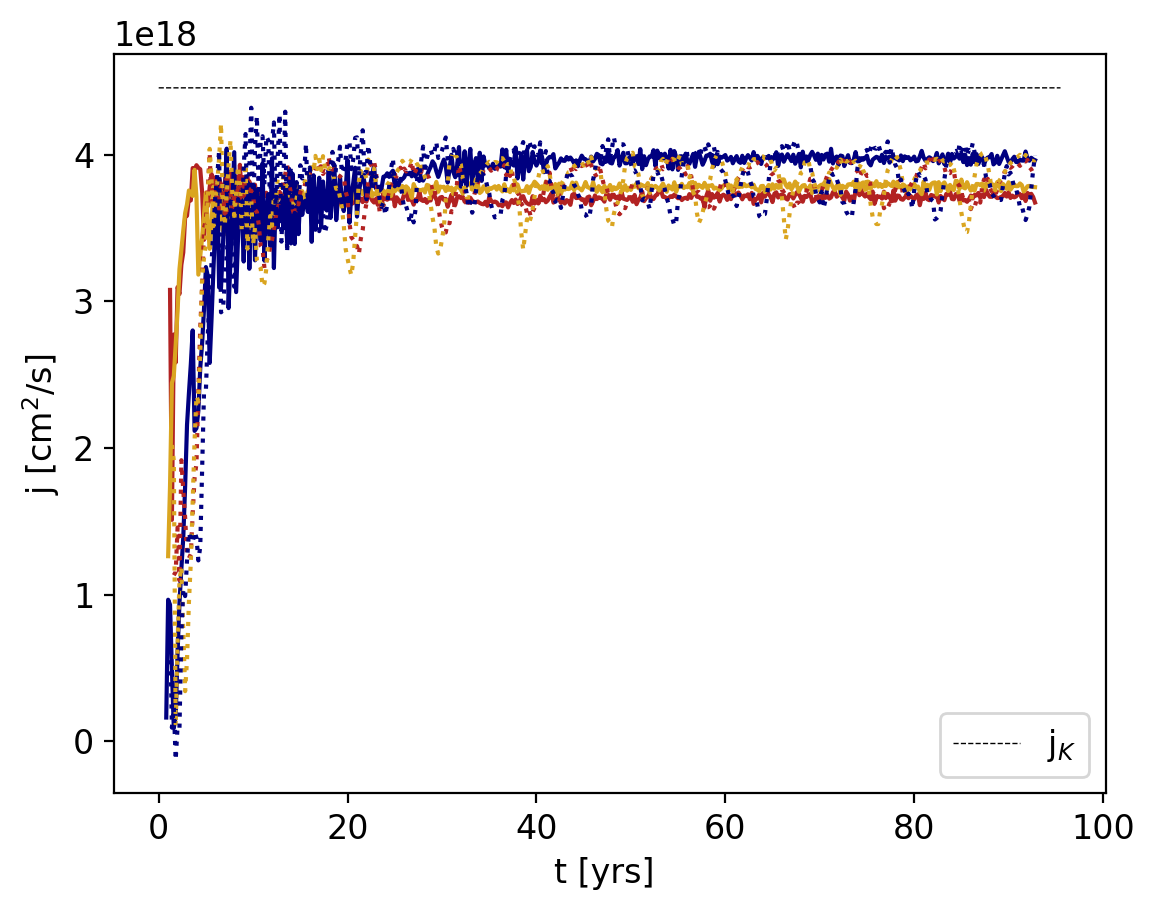

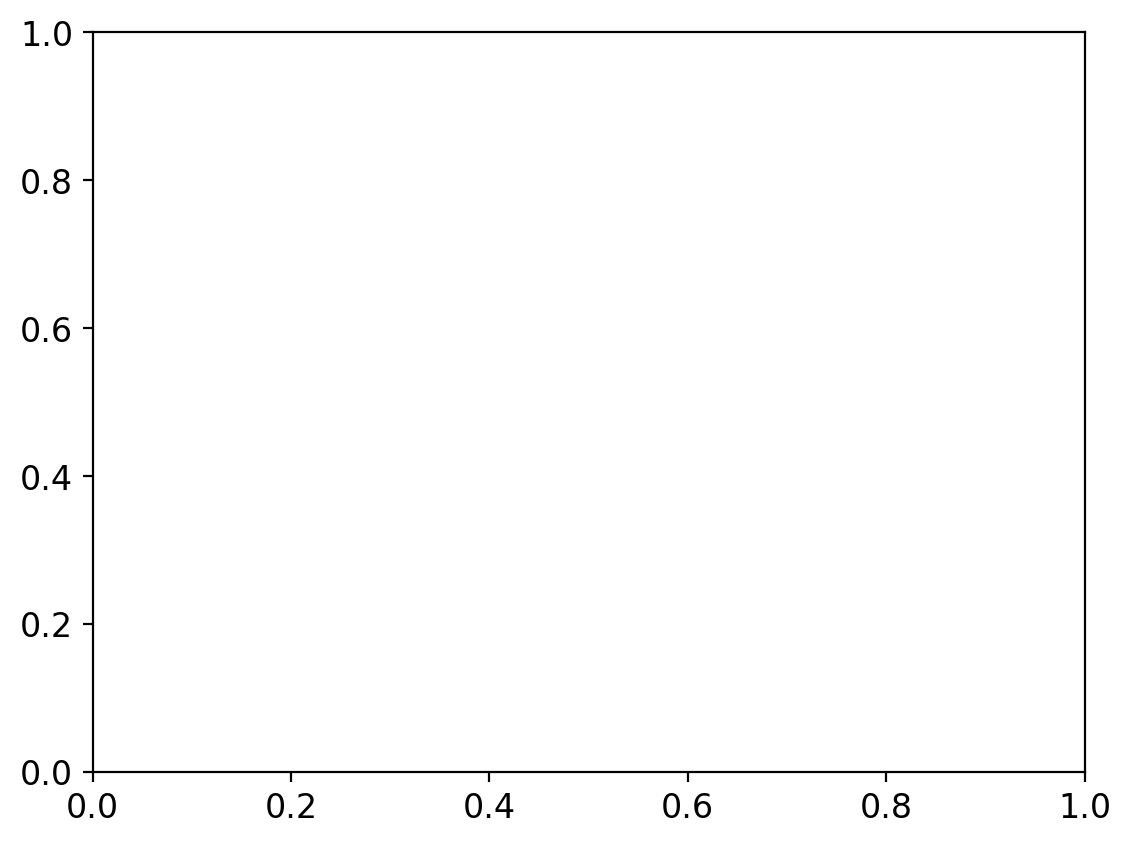

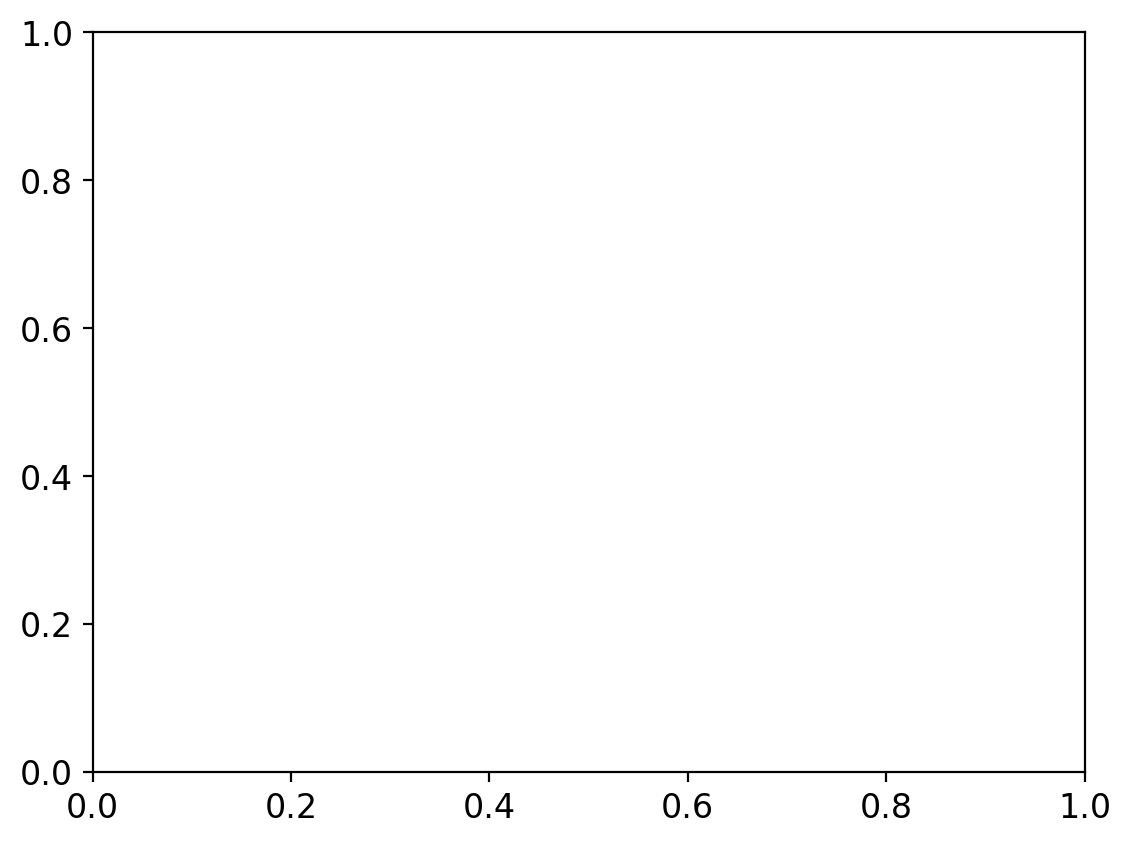

In [8]:
modelNames_all = ['v05e00','v10e00','v20e00','v05e50','v10e50','v20e50']
plot_J_6models(modelNames_all,'allModels')